# This notebook demonstrates the tokenization process using both WordPiece and BPE tokenizers and performs basic exploratory data analysis on the tokenized outputs.

In [1]:
import pandas as pd
from transformers import BertTokenizer, GPT2Tokenizer
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
df = pd.read_csv('IMDB Dataset.csv')

df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
texts = df['review'].tolist()

In [7]:
# Step 1: Tokenize with WordPiece (BERT Tokenizer)
wordpiece_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

wordpiece_tokens = [wordpiece_tokenizer.tokenize(text) for text in texts]

wordpiece_flat_tokens = [token for tokens in wordpiece_tokens for token in tokens]


C:\Users\rishi\AppData\Roaming\Python\Python311\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [11]:
# Step 2: Tokenize with BPE (GPT-2 Tokenizer)
bpe_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

bpe_tokens = [bpe_tokenizer.tokenize(text) for text in texts]

bpe_flat_tokens = [token for tokens in bpe_tokens for token in tokens]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

C:\Users\rishi\AppData\Roaming\Python\Python311\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


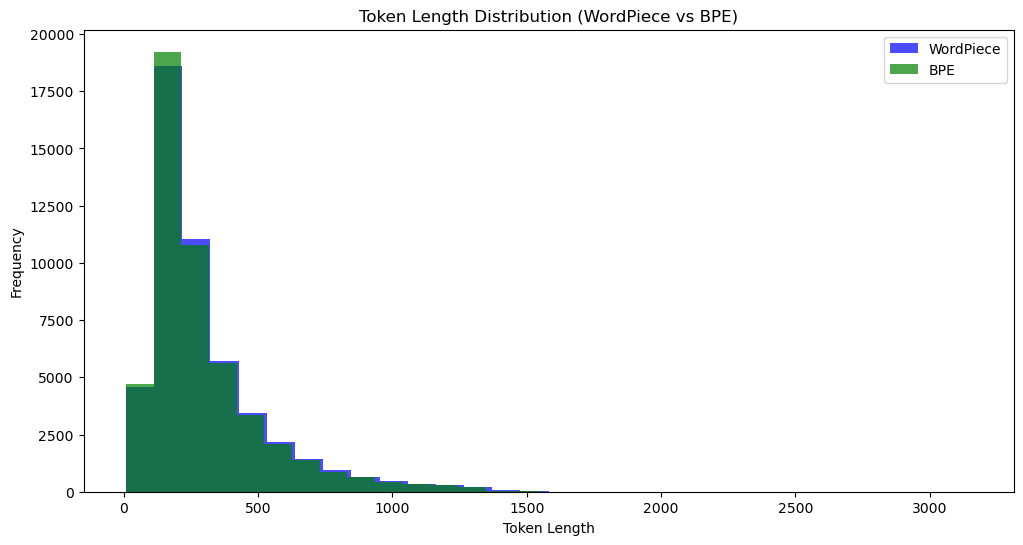

In [12]:
# Step 3: Perform Basic EDA
# Token Length Distribution
# Calculate the token length for each tokenizer
wordpiece_lengths = [len(tokens) for tokens in wordpiece_tokens]
bpe_lengths = [len(tokens) for tokens in bpe_tokens]

plt.figure(figsize=(12, 6))
plt.hist(wordpiece_lengths, bins=30, alpha=0.7, label='WordPiece', color='blue')
plt.hist(bpe_lengths, bins=30, alpha=0.7, label='BPE', color='green')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution (WordPiece vs BPE)')
plt.legend()
plt.show()

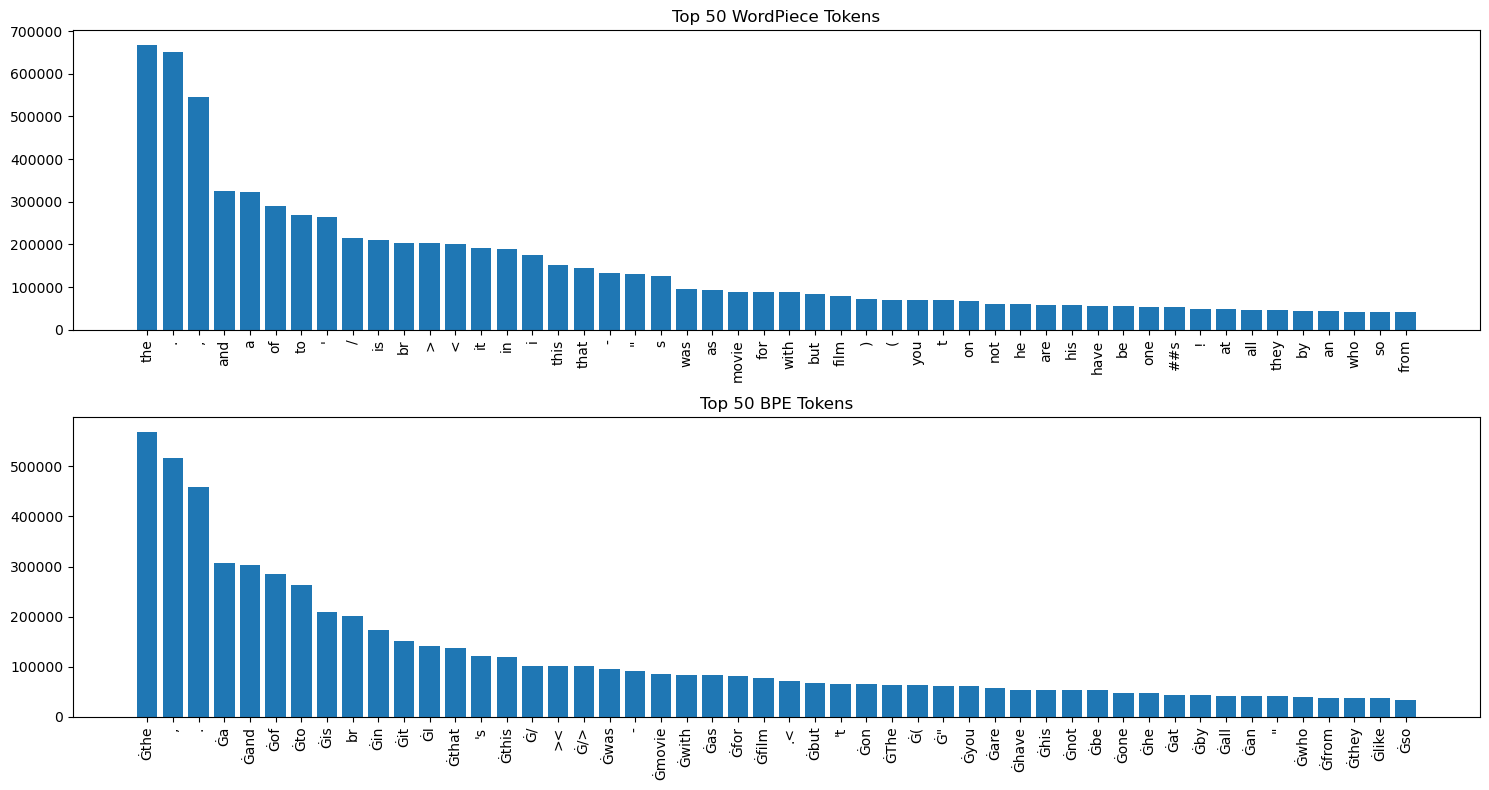

In [13]:
# Token Frequency Distribution
# Get the frequency of tokens for each tokenizer
wordpiece_token_counts = Counter(wordpiece_flat_tokens)
bpe_token_counts = Counter(bpe_flat_tokens)

# Plot the top 50 most common tokens for each tokenizer
plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
plt.bar(*zip(*wordpiece_token_counts.most_common(50)))
plt.title('Top 50 WordPiece Tokens')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
plt.bar(*zip(*bpe_token_counts.most_common(50)))
plt.title('Top 50 BPE Tokens')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()